### Task 1 - Data Collection
Here you will obtain the required data for the analysis. As described in the project instructions, you will perform a web scrap to obtain data from the NCDC website, import data from the John Hopkins repository, and import the provided external data.


### A - NCDC Website scrap
Website - https://covid19.ncdc.gov.ng/

In [2]:
# Write Your Code Below
# Import all libraries in this cell
import lxml
import requests
import numpy as np
import urllib.request
import pandas as pd
import csv
from bs4 import BeautifulSoup
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')  
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Save the data to a DataFrame object.
url = "https://covid19.ncdc.gov.ng"
ncdc_covid19_data = pd.read_html("https://covid19.ncdc.gov.ng/")[0]

### B - John Hopkins Data Repository
Here you will obtain data from the John Hopkins repository. Your task here involves saving the data from the GitHub repo link to DataFrame for further analysis. Find the links below. 
* Global Daily Confirmed Cases - Click [Here](https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv)
* Global Daily Recovered Cases - Click [Here](https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv)
* Global Daily Death Cases - Click [Here](https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv)

In [4]:
#[Write Your Code Here]
from urllib.request import urlretrieve
url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
urlretrieve(url, "time_series_covid19_confirmed_global.csv")
global_confirmed = pd.read_csv('time_series_covid19_confirmed_global.csv')
global_confirmed.head()


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/18/21,4/19/21,4/20/21,4/21/21,4/22/21,4/23/21,4/24/21,4/25/21,4/26/21,4/27/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,57793,57898,58037,58214,58312,58542,58730,58843,59015,59225
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,129594,129694,129842,129980,130114,130270,130409,130537,130606,130736
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,119642,119805,119992,120174,120363,120562,120736,120922,121112,121344
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,12805,12805,12874,12917,12942,13007,13024,13060,13083,13121
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,24389,24518,24661,24883,25051,25279,25492,25609,25710,25942


In [5]:
from urllib.request import urlretrieve
url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv"
urlretrieve(url, "time_series_covid19_recovered_global.csv")
global_recovered = pd.read_csv("time_series_covid19_recovered_global.csv")

In [6]:
from urllib.request import urlretrieve
url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"
urlretrieve(url, "time_series_covid19_deaths_global.csv")
global_deaths = pd.read_csv("time_series_covid19_deaths_global.csv")

### C - External Data 
* Save the external data to a DataFrame
* External Data includes but not limited to: `covid_external.csv`, `Budget data.csv`, `RealGDP.csv`

In [7]:
#[Write Your Code Here]
covid_external = pd.read_csv("covid_external.csv")
budget_data = pd.read_csv("Budget data.csv")
real_gdp = pd.read_csv("RealGDP.csv")

### Task 2 - View the data
Obtain basic information about the data using the `head()` and `info()` method.

In [8]:
#[Write Your Code Here]
print(ncdc_covid19_data.head())
print(ncdc_covid19_data.info())

  States Affected  No. of Cases (Lab Confirmed)  No. of Cases (on admission)  \
0           Lagos                         58367                          938   
1             FCT                         19773                          512   
2         Plateau                          9052                            8   
3          Kaduna                          9043                            6   
4          Rivers                          7101                           22   

   No. Discharged  No. of Deaths  
0           56990            439  
1           19095            166  
2            8987             57  
3            8972             65  
4            6978            101  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   States Affected               37 non-null     object
 1   No. of Cases (Lab Confirmed)

In [9]:
print(global_confirmed)
print(global_confirmed.info())

    Province/State      Country/Region        Lat        Long  1/22/20  \
0              NaN         Afghanistan  33.939110   67.709953        0   
1              NaN             Albania  41.153300   20.168300        0   
2              NaN             Algeria  28.033900    1.659600        0   
3              NaN             Andorra  42.506300    1.521800        0   
4              NaN              Angola -11.202700   17.873900        0   
..             ...                 ...        ...         ...      ...   
270            NaN             Vietnam  14.058324  108.277199        0   
271            NaN  West Bank and Gaza  31.952200   35.233200        0   
272            NaN               Yemen  15.552727   48.516388        0   
273            NaN              Zambia -13.133897   27.849332        0   
274            NaN            Zimbabwe -19.015438   29.154857        0   

     1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  4/18/21  4/19/21  \
0          0        0        0      

In [10]:
print(global_recovered.head())
print(global_recovered.info())

  Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  4/18/21  4/19/21  4/20/21  \
0        0        0        0        0  ...    52168    52244    52272   
1        0        0        0        0  ...   101584   102171   102601   
2        0        0        0        0  ...    83397    83514    83636   
3        0        0        0        0  ...    12203    12203    12285   
4        0        0        0        0  ...    22597    22600    22647   

   4/21/21  4/22/21  4/23/21  4/24/21  4/25/21  4/26/21  4/27/21  
0    52301    52348    52363    52392    52489   

In [11]:
print(global_deaths.head())
print(global_deaths.info())

  Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  4/18/21  4/19/21  4/20/21  \
0        0        0        0        0  ...     2539     2546     2549   
1        0        0        0        0  ...     2342     2347     2353   
2        0        0        0        0  ...     3155     3160     3165   
3        0        0        0        0  ...      123      123      123   
4        0        0        0        0  ...      561      563      565   

   4/21/21  4/22/21  4/23/21  4/24/21  4/25/21  4/26/21  4/27/21  
0     2557     2561     2565     2572     2582   

In [12]:
print(covid_external.head())
print(covid_external.info())

      states         region  Population  Overall CCVI Index  Age  \
0        FCT  North Central     4865000                 0.3  0.0   
1    Plateau  North Central     4766000                 0.4  0.5   
2      Kwara  North Central     3524000                 0.3  0.4   
3  Nassarawa  North Central     2783000                 0.1  0.3   
4      Niger  North Central     6260000                 0.6  0.0   

   Epidemiological  Fragility  Health System  Population Density  \
0              0.9        0.4            0.6                 0.9   
1              0.4        0.8            0.3                 0.3   
2              0.3        0.2            0.4                 0.2   
3              0.5        0.9            0.0                 0.1   
4              0.6        0.3            0.7                 0.1   

   Socio-Economic   Transport Availability  Acute IHR  
0             0.6                      0.2       0.79  
1             0.5                      0.3       0.93  
2             

In [13]:
print(budget_data.head())
print(budget_data.info())

      states  Initial_budget (Bn)  Revised_budget (Bn)
0       Abia               136.60               102.70
1    Adamawa               183.30               139.31
2  Akwa-Ibom               597.73               366.00
3    Anambra               137.10               112.80
4     Bauchi               167.20               128.00
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   states               37 non-null     object 
 1   Initial_budget (Bn)  37 non-null     float64
 2   Revised_budget (Bn)  37 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1016.0+ bytes
None


In [14]:
print(real_gdp.head())
print(real_gdp.info())

   Year           Q1           Q2           Q3           Q4
0  2014  15438679.50  16084622.31  17479127.58  18150356.45
1  2015  16050601.38  16463341.91  17976234.59  18533752.07
2  2016  15943714.54  16218542.41  17555441.69  18213537.29
3  2017  15797965.83  16334719.27  17760228.17  18598067.07
4  2018  16096654.19  16580508.07  18081342.10  19041437.59
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    7 non-null      int64  
 1   Q1      7 non-null      float64
 2   Q2      7 non-null      float64
 3   Q3      7 non-null      float64
 4   Q4      7 non-null      float64
dtypes: float64(4), int64(1)
memory usage: 408.0 bytes
None


### Task 3 - Data Cleaning and Preparation
From the information obtained above, you will need to fix the data format. 
<br>
Examples: 
* Convert to appropriate data type.
* Rename the columns of the scraped data.
* Remove comma(,) in numerical data
* Extract daily data for Nigeria from the Global daily cases data

TODO A - Clean the scraped data

In [15]:
#RENAMING COLUMNS FROM THE NCDC DATA

new_columns={"States Affected": "states","No. of Cases (Lab Confirmed)": "Lab Confirmed Cases",
"No. of Cases (on admission)": "Admitted Cases",
"No. Discharged": "Discharged Cases",
"No. of Deaths": "Death Cases"}

ncdc_covid19_data.rename(columns=new_columns, inplace=True)


In [16]:
#RENAMING COLUMNS FROM THE BUDGET DATA

budget_data.columns = ["states", "Initial budget(Bn)", "Revised budget(Bn)"]

In [17]:
#DELETING UNNECESSARY COLUMNS FROM JOHN HOPKINS DATA

columns_to_drop = ["Province/State", "Lat", "Long"]

global_confirmed.drop(columns = columns_to_drop, inplace = True)
global_recovered.drop(columns = columns_to_drop, inplace = True)
global_deaths.drop(columns = columns_to_drop, inplace = True)



In [18]:
#RENAMING COLUMNS FROM JOHN HOPKINS DATA

column_rename = {"Country/Region": "Country"}

global_confirmed.rename(columns = column_rename, inplace = True)
global_recovered.rename(columns = column_rename, inplace = True)
global_deaths.rename(columns = column_rename, inplace = True)


TODO B - Get a Pandas DataFrame for Daily Confirmed Cases in Nigeria. Columns are Date and Cases

## DAILY CONFIRMED CASES IN NIGERIA

In [19]:
#DAILY CONFIRMED CASES IN NIGERIA

df1 = global_confirmed[global_confirmed["Country"] == "Nigeria"]

columns_to_use = df1.iloc[:, 4:]

daily_confirmed_nigeria = df1.melt(value_vars=columns_to_use, var_name="Date", value_name="Cases")
daily_confirmed_nigeria["Date"] = pd.to_datetime(daily_confirmed_nigeria["Date"])

print(daily_confirmed_nigeria)


          Date   Cases
0   2020-01-25       0
1   2020-01-26       0
2   2020-01-27       0
3   2020-01-28       0
4   2020-01-29       0
..         ...     ...
454 2021-04-23  164633
455 2021-04-24  164684
456 2021-04-25  164719
457 2021-04-26  164756
458 2021-04-27  164912

[459 rows x 2 columns]


TODO C - Get a Pandas DataFrame for Daily Recovered Cases in Nigeria. Columns are Date and Cases

## DAILY RECOVERED CASES IN NIGERIA

In [20]:
#DAILY RECOVERED CASES IN NIGERIA

df2 = global_recovered[global_recovered["Country"] == "Nigeria"]

columns_to_use = df1.iloc[:, 4:]

daily_recovered_nigeria = df2.melt(value_vars=columns_to_use, var_name="Date", value_name="Cases")
daily_recovered_nigeria["Date"] = pd.to_datetime(daily_recovered_nigeria["Date"])

print(daily_recovered_nigeria)

          Date   Cases
0   2020-01-25       0
1   2020-01-26       0
2   2020-01-27       0
3   2020-01-28       0
4   2020-01-29       0
..         ...     ...
454 2021-04-23  154643
455 2021-04-24  154687
456 2021-04-25  154926
457 2021-04-26  154963
458 2021-04-27  155012

[459 rows x 2 columns]


TODO D - Get a Pandas DataFrame for Daily Death Cases in Nigeria. Columns are Date and Cases

## DAILY DEATH CASES IN NIGERIA

In [21]:
#DAILY DEATH CASES IN NIGERIA

df3 = global_deaths[global_deaths["Country"] == "Nigeria"]

columns_to_use = df1.iloc[:, 4:]

daily_deaths_nigeria = df3.melt(value_vars=columns_to_use, var_name="Date", value_name="Cases")
daily_deaths_nigeria["Date"] = pd.to_datetime(daily_deaths_nigeria["Date"])

print(daily_deaths_nigeria)

          Date  Cases
0   2020-01-25      0
1   2020-01-26      0
2   2020-01-27      0
3   2020-01-28      0
4   2020-01-29      0
..         ...    ...
454 2021-04-23   2061
455 2021-04-24   2061
456 2021-04-25   2062
457 2021-04-26   2062
458 2021-04-27   2063

[459 rows x 2 columns]


### Task 4 - Analysis
Here you will perform some analyses on the datasets. You are welcome to communicate findings in charts and summary. 
<br>
We have included a few TODOs to help with your analysis. However, do not let this limit your approach, feel free to include more, and be sure to support your findings with chart and summary 

In [22]:
#Importing libraries
import plotly.express as px
import plotly
import plotly.graph_objects as go
import datetime as dt
from plotly.subplots import make_subplots

TODO A - Generate a plot that shows the Top 10 states in terms of Confirmed Covid cases by Laboratory test

## DESCRIPTIVE ANALYSIS

In [23]:
ncdc_covid19_data.describe()

,Lab Confirmed Cases,Admitted Cases,Discharged Cases,Death Cases
count,37.000000,37.000000,37.000000,37.000000
mean,4457.081081,211.810811,4189.513514,55.756757
std,9813.701455,424.660834,9623.783838,77.438651
min,5.000000,0.000000,3.000000,2.000000
25%,930.000000,6.000000,747.000000,17.000000
50%,1909.000000,20.000000,1744.000000,32.000000
75%,3242.000000,99.000000,2814.000000,57.000000
max,58367.000000,1996.000000,56990.000000,439.000000


### Insights

1. Average number of COVID19 deaths across all states in Nigeria is approximately 56.
2. Highest number of deaths recorded in a state is 439 and minimum is 2.
3. 75% of cases result into approximately 57 deaths.
4. Highest number of discharged cases recorded in a state is 56990 and minimum is 3.
5. Average number of COVID19 admitted cases across all states in Nigeria is approximately 4188.

## TOP 10 LAB CONFIRMED CASES IN NIGERIA

In [24]:
#Assigning top 10 confirmed cases to a dataframe
top1 = ncdc_covid19_data.nlargest(10, "Lab Confirmed Cases").sort_values("Lab Confirmed Cases", ascending=True)

#Creating plot
fig2 = px.bar(top1, x = 'Lab Confirmed Cases', y = "states", height = 600, color = 'Lab Confirmed Cases', orientation = 'h', color_continuous_scale = 'blugrn', title = 'Top 10 LAB CONFIRMED CASES IN NIGERIA')

#Showing plot
fig2.show()

TODO B - Generate a plot that shows the Top 10 states in terms of Discharged Covid cases. Hint - Sort the values

## TOP 10 DISCHARGED CASES IN NIGERIA

In [44]:
#Assigning top 10 discharged cases to a datafrme
top2 = ncdc_covid19_data.nlargest(10, "Discharged Cases").sort_values("Discharged Cases", ascending=True)

#Creating plo
fig2 = px.bar(top2, x = 'Discharged Cases', y = "states", height = 600, color = 'Discharged Cases', orientation = 'h', color_continuous_scale = 'brwnyl', title = 'TOP 10 DISCHARGED CASES IN NIGERIA')

#Showing plot
fig2.show()

TODO D - Plot the top 10 Death cases

## TOP 10 DEATH CASES IN NIGERIA

In [26]:
#Assigning to 10 death cases to a dataframe
top3 = ncdc_covid19_data.nlargest(10, "Death Cases").sort_values("Death Cases", ascending=True)

#Creating plot
fig3 = px.bar(top3, x = 'Death Cases', y = "states", height = 600, color = 'Death Cases', orientation = 'h', color_continuous_scale = 'oryel', title = 'TOP 10 DEATH CASES IN NIGERIA')

#Showing plot
fig3.show()

## TOTAL DAILY CONFIRMED, RECOVERED AND DEATH CASES IN NIGERIA

TODO E - Generate a line plot for the total daily confirmed, recovered and death cases in Nigeria

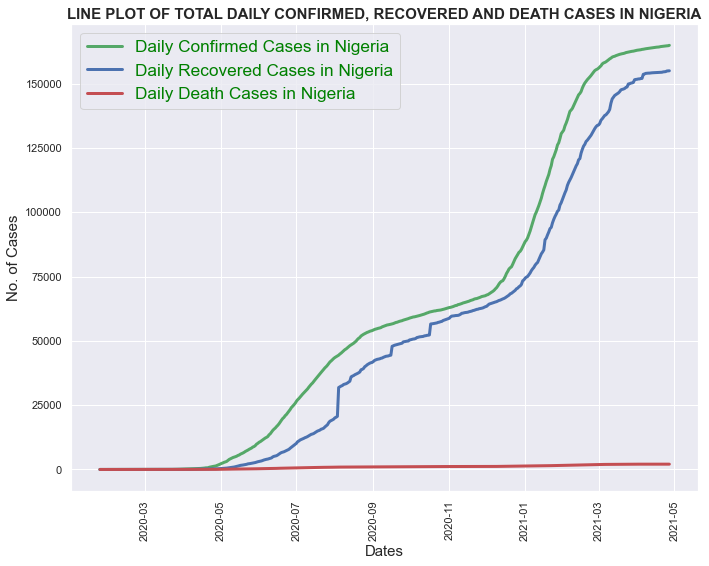

In [27]:
#Setting Style and Plot Size
sns.set_style("dark")
sns.set(rc={'figure.figsize':(10,8)})

#Creating plots
sns.lineplot(daily_confirmed_nigeria.Date, daily_confirmed_nigeria.Cases,linewidth=3, label="Daily Confirmed Cases in Nigeria", color="g", markers="o")

sns.lineplot(daily_recovered_nigeria.Date, daily_recovered_nigeria.Cases,linewidth=3, label="Daily Recovered Cases in Nigeria", color="b")

sns.lineplot(daily_deaths_nigeria.Date, daily_deaths_nigeria.Cases,linewidth=3, label="Daily Death Cases in Nigeria", color="r")

#Customizing Title and Adding Labels,Legend
plt.xlabel("Dates", fontsize=15)
plt.ylabel("No. of Cases", fontsize=15)
plt.xticks(rotation=90)
plt.title ("LINE PLOT OF TOTAL DAILY CONFIRMED, RECOVERED AND DEATH CASES IN NIGERIA", fontsize=15, fontweight="bold")
plt.legend(fontsize='x-large',labelcolor="green")

plt.show()

## DAILY INFECTION RATE IN NIGERIA

TODO F - 
* Determine the daily infection rate, you can use the Pandas `diff` method to find the derivate of the total cases.
* Generate a line plot for the above

In [28]:
#Determining the Dauly Infection Rate

daily_confirmed_nigeria["Cases"].diff()

0        NaN
1        0.0
2        0.0
3        0.0
4        0.0
       ...  
454     45.0
455     51.0
456     35.0
457     37.0
458    156.0
Name: Cases, Length: 459, dtype: float64

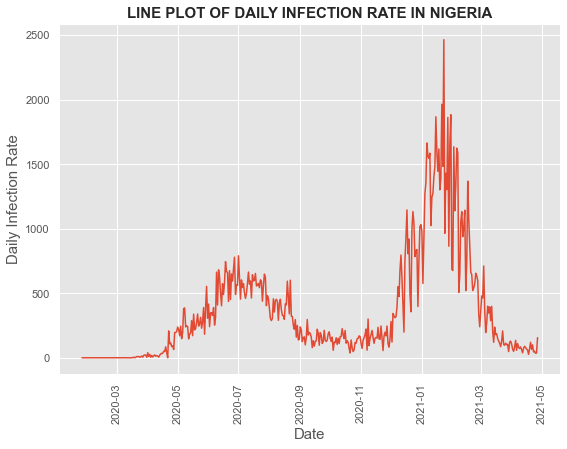

In [29]:
#Setting Style
plt.style.use("ggplot")
fig = plt.figure(figsize = (8, 6))
#Creating plot
plt.plot(daily_confirmed_nigeria.Date, daily_confirmed_nigeria["Cases"].diff())

#Customizing Title and adding labels
plt.xlabel("Date", fontsize=15)
plt.ylabel("Daily Infection Rate", fontsize=15)
plt.xticks(rotation=90)
plt.title("LINE PLOT OF DAILY INFECTION RATE IN NIGERIA", fontsize=15, fontweight="bold" )

plt.show()

TODO G - 
* Calculate maximum infection rate for a day (Number of new cases)
* Find the date

## MAXIMUM INFECTION RATE IN NIGERIA

In [30]:
#Calculaing Maximum Infection Rate
daily_confirmed_nigeria["Daily Infection Rate"] = daily_confirmed_nigeria["Cases"].diff()
max_infection_rate = daily_confirmed_nigeria["Daily Infection Rate"].max()

#Finding the date of maximum infection
max_infection_date = daily_confirmed_nigeria.loc[(daily_confirmed_nigeria["Daily Infection Rate"] == max_infection_rate), "Date"]

print("The maximum infection rate for a day (Number of new cases) \n", max_infection_rate)
print ("The date of maximum infection rate [Number of new cases] \n", max_infection_date)


The maximum infection rate for a day (Number of new cases) 
 2464.0
The date of maximum infection rate [Number of new cases] 
 364   2021-01-23
Name: Date, dtype: datetime64[ns]


TODO H - Determine the relationship between the external dataset and the NCDC COVID-19 dataset. 
Here you will generate a line plot of top 10 confirmed cases and the overall community vulnerability index on the same axis. From the graph, explain your observation.
<br>
Steps
* Combine the two dataset together on a common column(states)
* Create a new dataframe for plotting. This DataFrame will contain top 10 states in terms of confirmed cases i.e sort by confirmed cases. ** Hint: Check out Pandas [nlargest](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nlargest.html) function. This [tutorial](https://cmdlinetips.com/2019/03/how-to-select-top-n-rows-with-the-largest-values-in-a-columns-in-pandas/) can help out ** 
* Plot both variable on the same axis. Check out this [tutorial](http://kitchingroup.cheme.cmu.edu/blog/2013/09/13/Plotting-two-datasets-with-very-different-scales/)

## RELATIONSHIP BETWEEN CONFIRMED CASES AND OVERALL CCVI INDEX

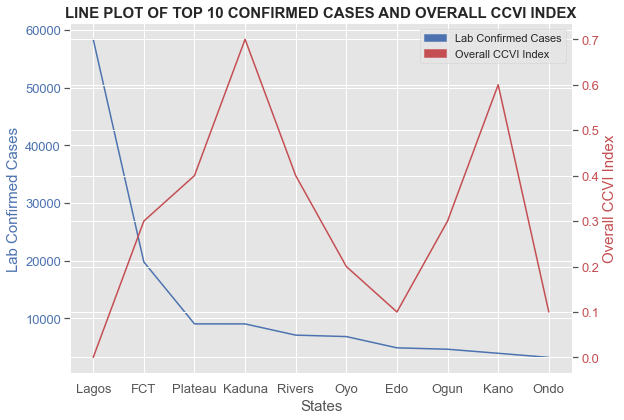

In [31]:
import matplotlib.patches as mpatches

#Combining the two datasets: ncdc_covid_19_data AND covid_external
ncdc_covid_external = ncdc_covid19_data.merge(covid_external, on="states")

#Creating a new dataframe of top 10 states in terms of confirmed cases
ncdc_covid_largest = ncdc_covid_external.nlargest(10,["Lab Confirmed Cases"])

#Setting style and figsize
plt.style.use("ggplot")
fig = plt.figure(figsize = (8, 6))
ax1 = fig.add_subplot(111)

#Creating plots
ax1.plot(ncdc_covid_largest["states"], ncdc_covid_largest["Lab Confirmed Cases"], color="b")
ax1.set_ylabel("Lab Confirmed Cases", color="b", fontsize=15)

ax2 = ax1.twinx()
ax2.plot(ncdc_covid_largest["states"], ncdc_covid_largest["Overall CCVI Index"], "r-")

#Customizing labels and title
ax2.set_ylabel("Overall CCVI Index", color="r", fontsize=15)
for tl in ax1.get_yticklabels():
    tl.set_color('b')


for tl in ax2.get_yticklabels():
    tl.set_color('r')
plt.xticks(rotation=90)
plt.title("LINE PLOT OF TOP 10 CONFIRMED CASES AND OVERALL CCVI INDEX", fontsize=15, fontweight="bold")
ax1.set_xlabel("States", fontsize=15)
plt.setp(ax1.get_xticklabels(), fontsize=13)
plt.setp(ax1.get_yticklabels(), fontsize=13)
plt.setp(ax2.get_yticklabels(), fontsize=13)

#Adding legend
blue_patch = mpatches.Patch(color='b', label="Lab Confirmed Cases")
red_patch = mpatches.Patch(color='r', label="Overall CCVI Index")

plt.legend(handles=[blue_patch, red_patch],loc="best")

plt.show() 



OBSERVATIONS

This line plot shows the top 10 states with Confirmed COVID19 Cases and their Overall Community Vunerability Index (CCVI).
From the plot, the following observations are deduced:

1. Lagos state, which has the highest number of COVID19 cases, actually has the lowest Overall CCVI Index of 0.0, in other words, it is the least vunerable to COVID19 with all factors (like age, fragility, etc.,) being considered.

2. Edo and Ondo states both have a low Overall CCVI Index of 0.1.

3. The rest of the states have a higher Overall CCVI Index compared to Lagos, Edo and Ondo, with Kaduna and Kano having the highest CCVI Index of 0.7 and 0.6 respectively, meaning they are highly vunerable to COVID19, suffice to say, this two states have earned their spots at the top 10 states with Confirmed COVID19 Cases.

    Although the same cannot be said about Lagos, Edo and Ondo, which begs the question:
    
 Why would states with very low Overall CCVI Index be among the top 10 states with Confirmed COVID19 Cases????

TODO I - Determine the relationship between the external dataset and the NCDC COVID-19 dataset. 
* Here you will generate a regression plot between two variables to visualize the linear relationships - Confirmed Cases and Population Density.
Hint: Check out Seaborn [Regression Plot](https://seaborn.pydata.org/generated/seaborn.regplot.html).
* Provide a summary of your observation

## RELATIONSHIP BETWEEN LAB CONFIRMED CASES AND POPULATION DENSITY

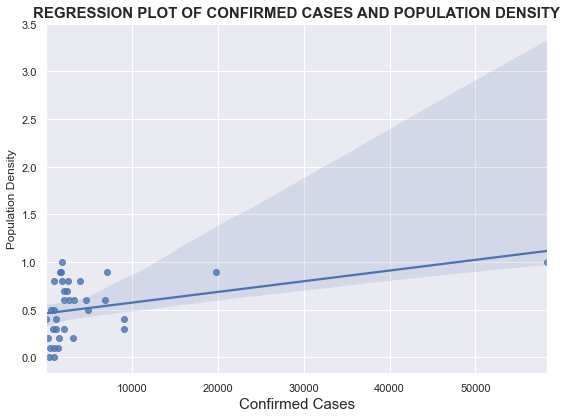

In [32]:
# Setting style and plot size
sns.set_style("dark")
sns.set(rc={'figure.figsize':(8,6)})

# Creating plot
ax = sns.regplot(x="Lab Confirmed Cases", y="Population Density", data=ncdc_covid_external)

#Customizing title and labels
ax.set_title("REGRESSION PLOT OF CONFIRMED CASES AND POPULATION DENSITY", fontsize=15, fontweight="bold")
ax.set_xlabel("Confirmed Cases", fontsize=15)
ax.set_ylabel("Population Density")

plt.show()

OBSERVATIONS

This regression plot shows the linear relationship between all Confirmed Cases in the states and their Population Density. From the plot, it is evident that there is little correlation between the two variables.

TODO J - 
* Provide more analyses by extending TODO G & H. Meaning, determine relationships between more features.
* Provide a detailed summary of your findings. 
* Note that you can have as many as possible.

# EXTENDING ANALYSIS....

## DEGREE OF CORRELATION BETWEEN LAB CONFIRMED CASES AND VARIOUS RISK FACTORS

Method : Using heatmap to visualize the correlation of cases with other factors from the dataset.This correlation calculation is performed on the top ten most affected countries only.


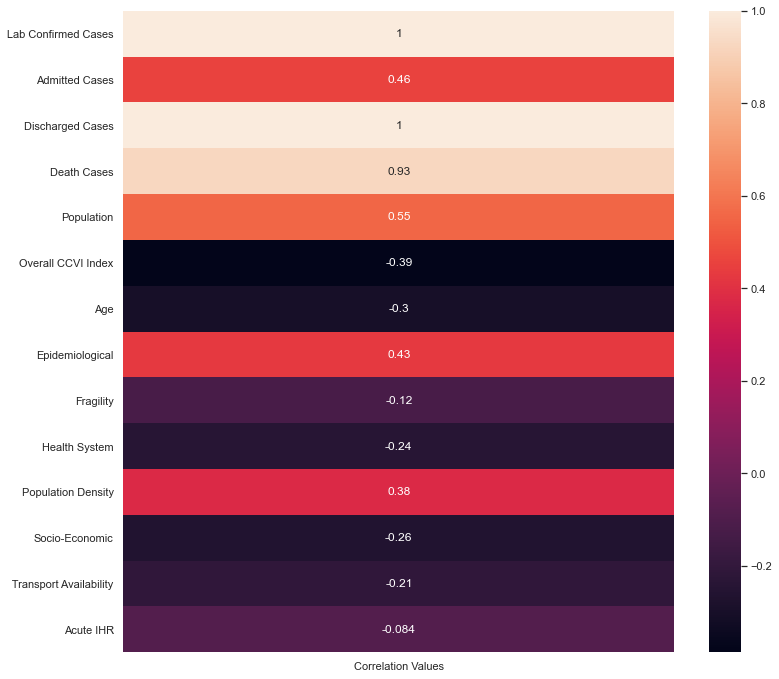

In [33]:
#Assigning correlation values to a dataframe
heatmap_df = pd.DataFrame({"Correlation Values": ncdc_covid_external.corr()["Lab Confirmed Cases"].values}, index=ncdc_covid_external.corr()["Lab Confirmed Cases"].index)

#Setting plot size
plt.figure(figsize=(11, 11))

#Creating plot
sns.heatmap(heatmap_df, annot=True)

#Showing plot
plt.show()

### Insights

A degree of correlation indicates how a change in one variable affects another variable and can be positive or negative. This correlation calculation is performed on the top ten most affected countries only.

Values will range from 1 (very strong positve correlation,i.e, as one goes up, the other tends to also) to -1 (very strong negative correlation,i.e, as one goes up, the other will tends to push down, or vice-versa) and 0 (no linear trend).
 

 Checking correlations between variables:

    1.Number of discharged cases and death cases are highly positively correlated with number of Lab confirmed cases.
    2.Population is positively correlated with number of Lab confirmed cases with a value of 0.55.
    3.Number of admitted cases and epidermological factor have an average positive correlation with Number of lab cases
    4.Overall CCVI Index, Age, Fragility, Health System, Socio-Economic, Transport Availability and Acute IHR factors all have negative correlations with number of Lab Confirmed Cases

Hence, we see that most attributes have negative correlations with the total number of cases while one attribute has a positive correlation. The total number of cases obviously has a direct correlation value of 1 with itself. However, none of the correlation values are high correlation values which are usually greater than 0.6 or lesser than -0.6. Perhaps, this goes to show how devastatingly widespread the effects of this contagious disease is.

### A. Lab Confirmed Cases vs Discharged Cases and Death Cases

Method: Using regression plot to visualize Lab Confirmed Cases vs Discharged Cases and Death Cases

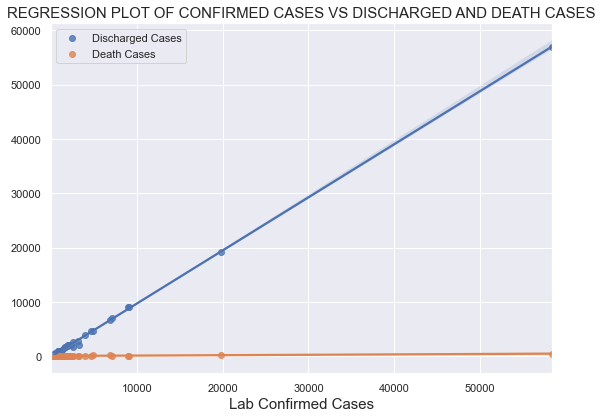

In [34]:
# Setting style and plot size
sns.set_style("dark")
sns.set(rc={'figure.figsize':(8,6)})

# Creating plot
ax1 = sns.regplot(x="Lab Confirmed Cases", y="Discharged Cases", data=ncdc_covid_external, label="Discharged Cases")
ax2= sns.regplot(x="Lab Confirmed Cases", y="Death Cases", data=ncdc_covid_external, label="Death Cases")

#Customizing title and labels
ax1.set_title("REGRESSION PLOT OF CONFIRMED CASES VS DISCHARGED AND DEATH CASES", fontsize=15)
ax2.set_xlabel("Lab Confirmed Cases", fontsize=15)
ax1.set_ylabel(None)

plt.legend()
plt.show()

### Insights

This shows that there is a linear relationship between:

1.Lab confirmed cases and Discharged cases

2.Lab confirmed cases and Death cases,
 
 
 Since an increase in one leads to a corresponding increase in the other.

### B. Lab Confirmed Cases and Population

Method: Using scatter plot to visualize lab confirmed cases and population, then setting size to population

In [35]:
# Creating plot
fig1 = px.scatter(ncdc_covid_external, x = 'Lab Confirmed Cases', y = "Population" , size = 'Lab Confirmed Cases', size_max = 50, title = 'SCATTER PLOT OF LAB CONFIRMED CASES VS POPULATION')

#Showing plot
fig1.show()

### Insights

This shows that densely populated states have a higher number of lab confirmed cases while sparsely populated states have lower number lab confirmed cases.

## NIGERIA REGION-WISE CLASSIFICATION

Method: Using a bar chart to visualize the classification of COVID19 Cases across regions in Nigeria

In [36]:

#Group by regions
ncdc_region= ncdc_covid_external[['region','Discharged Cases','Admitted Cases','Death Cases']]
ncdc_reg=ncdc_region.groupby('region').sum().reset_index().sort_values("Discharged Cases", ascending=True)

#Creating plot
fig8 = go.Figure(data = [
    go.Bar(name = 'Discharged Cases', y = ncdc_reg['region'], x = ncdc_reg['Discharged Cases'], orientation='h'),
    go.Bar(name = 'Admitted Cases', y = ncdc_reg['region'], x = ncdc_reg['Admitted Cases'], orientation='h'),
    go.Bar(name = 'Death Cases', y = ncdc_reg['region'], x = ncdc_reg['Death Cases'], orientation='h')
])
fig8.update_layout(title = 'TOTAL COVID19 CASES BY REGION', barmode = 'stack', height = 600)
fig8.show()

OBSERVATIONS

This bar chart represents the total confirmed COVID19 Cases base on Regions.

From this chart, the following deductions were made:

1. The South West region has the highest number of Confirmed COVID19 Cases which totals to 76,023 cases.

2. While the North East region has the lowest number of Confirmed COVID19 Cases which totals to 7,235 cases.

## EFFECT OF THE PANDEMIC ON NIGERIA'S GDP

### TODO L - 
Determine the effect of the Pandemic on the economy. To do this, you will compare the Real GDP value Pre-COVID-19 with Real GDP in 2020 (COVID-19 Period, especially Q2 2020)
<br>
Steps
* From the Real GDP Data, generate a `barplot` using the GDP values for each year & quarters. For example: On x-axis you will have year 2017 and the bars will be values of each quarters(Q1-Q4). You expected to have subplots of each quarters on one graph.
<br>
Hint: Use [Pandas.melt](https://pandas.pydata.org/docs/reference/api/pandas.melt.html) to create your plot DataFrame 
* Set your quarter legend to lower left.
* Using `axhline`, draw a horizontal line through the graph at the value of Q2 2020.
* Write out your observation

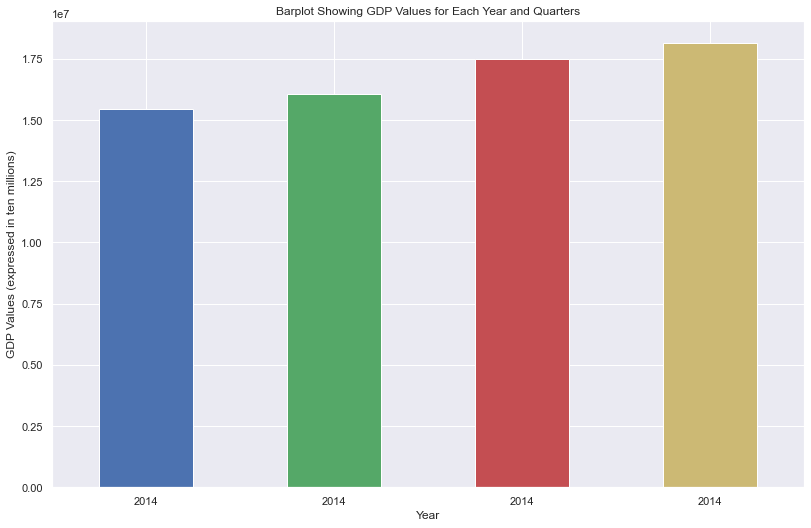

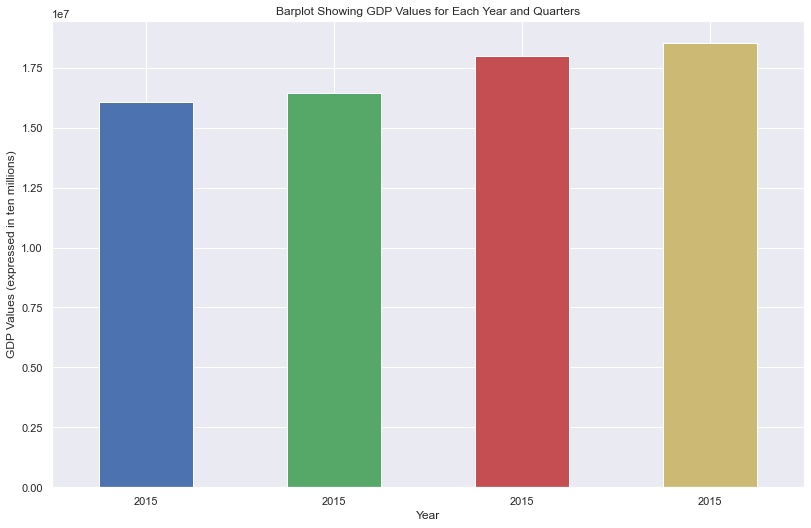

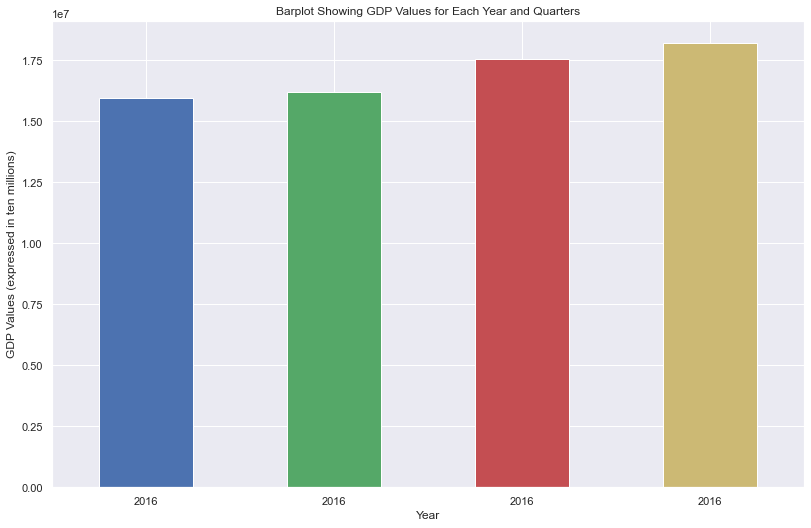

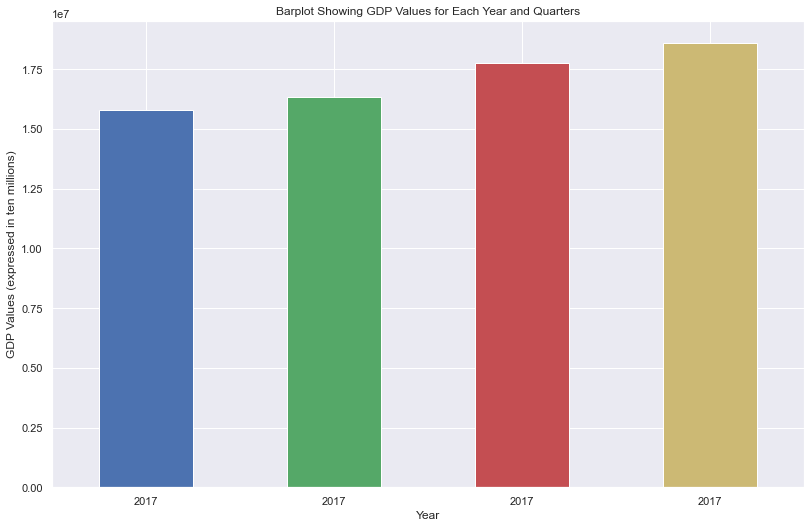

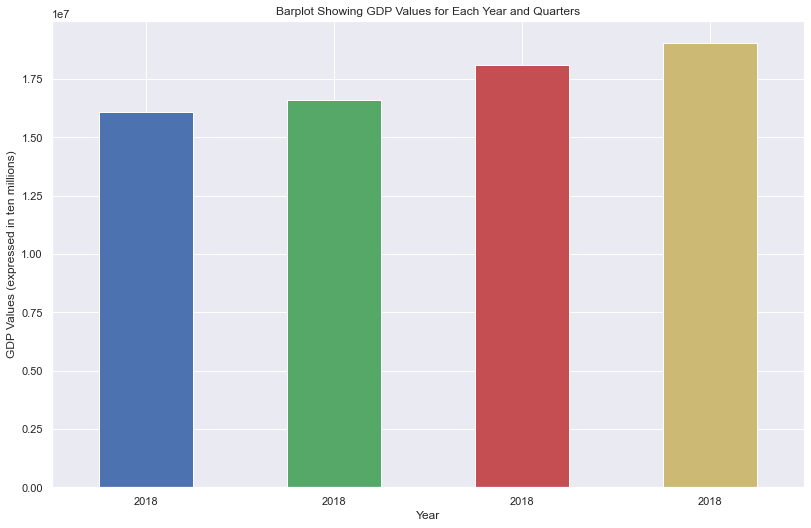

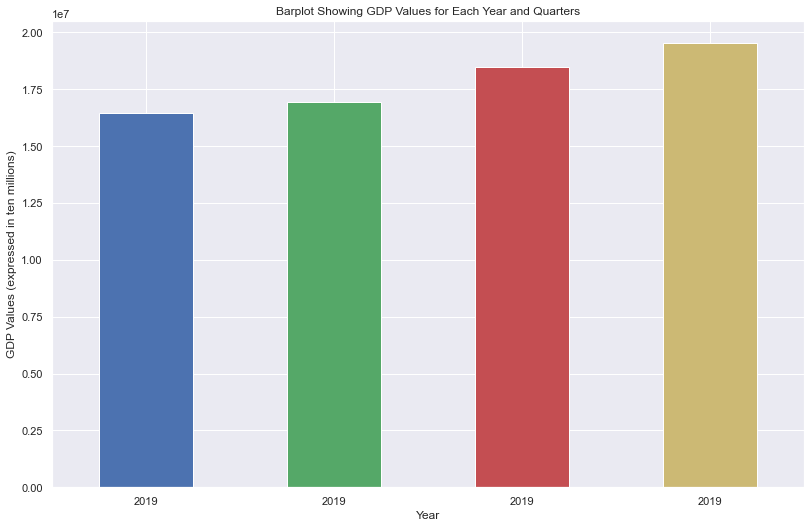

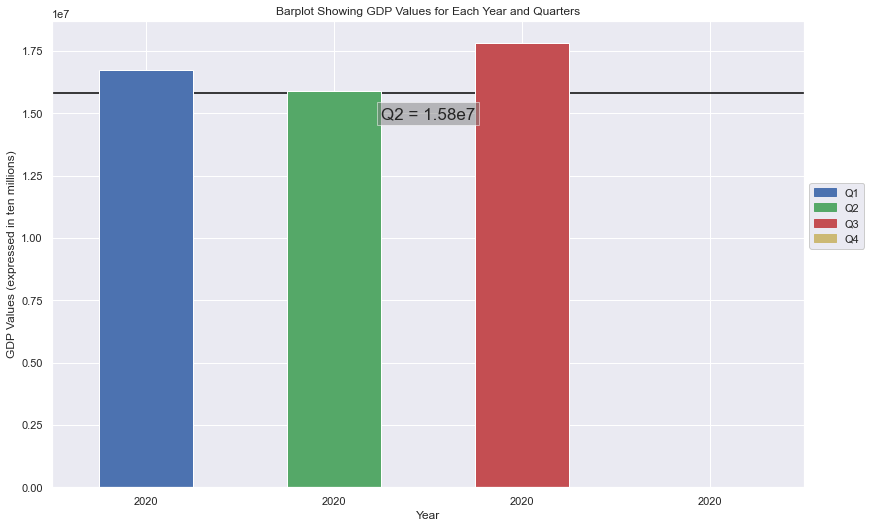

In [37]:
#importing library
import matplotlib.patches as mpatches

#Melting the dataframe
real_gdp1 = real_gdp.melt(id_vars="Year", value_vars=["Q1", "Q2", "Q3", "Q4"], var_name="Quarters", value_name="GDP Value")
real_gdp2 = real_gdp1.groupby("Year")

#Creating plot
real_gdp2.plot(x = "Year", y = "GDP Value", kind="bar", title="Barplot Showing GDP Values for Each Year and Quarters", figsize = (12,8), xlabel="Year", ylabel="GDP Values (expressed in ten millions)", color=["b", "g", "r", "y"], legend=False, rot=0, zorder=2)

#Creating axhline
plt.axhline(y=1.58e7, linewidth=1.5, zorder=1,color="black")
plt.annotate(text="Q2 = 1.58e7", xy=(1.25, 1.48e7), fontsize=17, xycoords="data", bbox=dict(facecolor="gray",alpha=0.5))

#Setting legend
blue_patch = mpatches.Patch(color='b', label='Q1')
green_patch = mpatches.Patch(color='g', label='Q2')
red_patch = mpatches.Patch(color='r', label='Q3')
yellow_patch = mpatches.Patch(color='y', label='Q4')

plt.legend(handles=[blue_patch, green_patch, red_patch, yellow_patch],loc='lower left', bbox_to_anchor=(1.0, 0.5), framealpha=1, frameon=True)

plt.show()


OBSERVATIONS

This bar chart has subplots that shows the Real GDP for the Quarters (Q1, Q2, Q3 and Q4) of each year from 2014 to 2020.

From the bar plot, the following deductions were made:

Year 2020 recorded its lowest Real GDP as of the time of this analysis, in its second quarter(Q2) with a value of 15.89 million which is the lowest Real GDP for Q2 recorded from the Year 2014 till 2020 and this could be associated with the effect of the pandemic on the country as at the time, since the Real GDP of Nigeria Pre-COVID19, especially during the second quarters (Q2) is higher than the present Q2 for 2020.

## EFFECT OF THE PANDEMIC ON NIGERIA'S BUDGET

Method: Using line plot to visualize the initial budget and revised budget of all Nigerian States

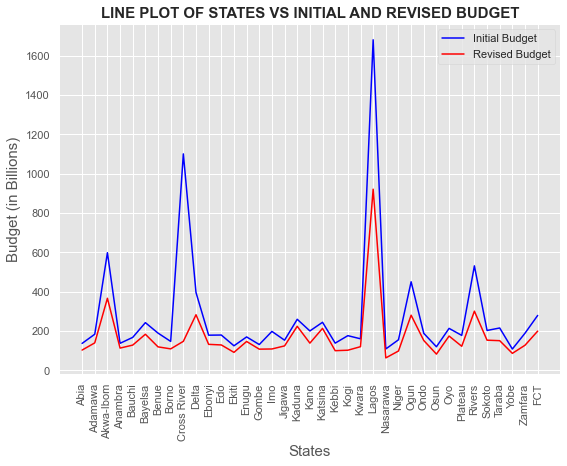

In [38]:

#Setting Style
plt.style.use("ggplot")

#Creating plot
plt.plot(budget_data.states, budget_data["Initial budget(Bn)"], label="Initial Budget", color="blue")
plt.plot(budget_data.states, budget_data["Revised budget(Bn)"], label="Revised Budget", color="red")
#Customizing Title and adding labels
plt.xlabel("States", fontsize=15)
plt.ylabel("Budget (in Billions)", fontsize=15)
plt.xticks(rotation=90)
plt.title("LINE PLOT OF STATES VS INITIAL AND REVISED BUDGET", fontsize=15, fontweight="bold")

plt.legend()
plt.show()


### Insights

From this line chart, it is evident that all states in Nigeria had to revise their initial budget to a lower value. This is due to the effect that that COVID19 has on the economy.

### Note: Do not limit your analysis to the provided TODOs. Perform more analyses e.g 
* Check for more external dataset
* Ask more questions & find the right answers by exploring the data

In [39]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import plotly
import plotly.graph_objects as go
import datetime as dt
import requests
from plotly.subplots import make_subplots

## MAP OVERVIEW OF NIGERIAN STATES AND COVID19 CASES

Method: Using the Folium python library to visualize the map based on states coordinates

In [40]:
#For getting world map
import folium

#Reading latitude and longitude from csv file
coordinates =pd.read_csv("nigerian_states_coordinates.csv", usecols=["admin_name", "lat","lng", "capital"])

#Data cleaning
#Dropping unnecessary columns
dropcolumn=coordinates[coordinates["capital"] != "minor"]
dropcolumn.reset_index(drop=True, inplace=True)
del dropcolumn["capital"]

#Renaming some columns for simplicity
new_names = {
    "lat":"Latitude",
    "lng":"Longitude",
    "admin_name":"states"
}
dropcolumn.rename(columns=new_names, inplace=True)

#Dropping some columns
nig_coordinates= dropcolumn[["states", "Latitude", "Longitude"]]
nig_coordinates["states"] = nig_coordinates["states"].replace("Federal Capital Territory", "FCT")

#Merging coordinates with ncdc data
nig_geo_ncdc=pd.merge(nig_coordinates, ncdc_covid19_data, how="inner", on="states")

#Converting int to str to add to map
nig_geo_ncdc["Lab Confirmed Cases"] = nig_geo_ncdc["Lab Confirmed Cases"].apply(str)
nig_geo_ncdc["Admitted Cases"] = nig_geo_ncdc["Admitted Cases"].apply(str)
nig_geo_ncdc["Discharged Cases"] = nig_geo_ncdc["Discharged Cases"].apply(str)
nig_geo_ncdc["Death Cases"] = nig_geo_ncdc["Death Cases"].apply(str)

#Retrieving the data from the datasets and plotting it on the Nigerian Map
nigeria = folium.Map(location = [9.0820,8.6753],zoom_start=6.5,tiles='Stamen Terrain')

#Adding map
for state,lat,long,confirmed,admitted,discharged,death in zip(list(nig_geo_ncdc['states']),list(nig_geo_ncdc['Latitude']),list(nig_geo_ncdc['Longitude']),list(nig_geo_ncdc['Lab Confirmed Cases']),list(nig_geo_ncdc['Admitted Cases']),list(nig_geo_ncdc['Discharged Cases']),list(nig_geo_ncdc['Death Cases'])):

    #Creating circle marker
    folium.CircleMarker(location = [lat,long],
                       radius = 5,
                       color='red',
                       fill = True,
                       fill_color="red").add_to(nigeria)

    #Creating marker
    folium.Marker(location = [lat,long],
              popup='<strong><b>states  : '+state+'</strong> <br>' +
                    '<strong><b>Lab Confirmed Cases :'+confirmed+'</striong><br>' +
                    '<strong><b>Admitted Cases :'+admitted+'</striong><br>' +
                    '<strong><b>Discharged Cases:'+discharged+'</striong><br>' +
                    '<strong><b>Death Cases :'+death+'</striong>' ).add_to(nigeria)

#Showing map
nigeria

### Insights

This map is a showcase of the visualization of all Nigerian States and how they have been affected by the virus.


## COMPARING NIGERIA

### A. HOW DOES NIGERIA'S COVID19 CASE COMPARE TO TOP AFFECTED COUNTRIES?

### STEP 1: Top 5 Countries with Highest Confirmed COVID19 Cases

Method : Using csv data from WHO, plot a horizontal bar chart with "Country" in the y_axis and "Total Confirmed Cases" in the x-axis

In [41]:

#Reading WHO csv
who_global=pd.read_csv("WHO-COVID-19-global-table-data.csv")

#Data Cleaning
    #Renaming Columns for simplicity
who_global.columns = ["Country", "WHO Region", "Total Confirmed Cases", "Total Confirmed Cases per 10000 population", "Newly Reported Confirmed Cases in Last 7 days", "Newly Reported Confirmed Cases in Last 7 days per 10000 population", "Newly Reported Confirmed Cases in Last 24 hours", "Total Death Cases", "Total Death Cases per 10000 population", "Newly Reported Death Cases in Last 7 days", "Newly Reported Death Cases in Last 7 days per 10000 population", "Newly Reported Death Cases in Last 24 hours", "Transmission Classification" ]
    #Replacing country name
who_global["Country"] = who_global["Country"].replace("United States of America", "USA")
    #Dropping unnecessary row
drop_global=who_global[who_global["Country"]!="Global"]
    #Sorting by 10 top countries with highest COVID19 cases
who_global_top = drop_global.nlargest(5, "Total Confirmed Cases").sort_values("Total Confirmed Cases", ascending=True)

#Creating plot
fig3 = px.bar(who_global_top.sort_values("Total Confirmed Cases", ascending=True), x = 'Total Confirmed Cases', y = "Country", height = 600, color ='Total Confirmed Cases', orientation = 'h', color_continuous_scale = 'oryel', title = 'TOP 5 COUNTRIES IN TERMS OF CONFIRMED COVID19 CASES')

#Showing plot
fig3.show()

### Insights
The top 5 countries with the highest confirmed cases of COVID19 Cases are: USA, India, Brazil, France and Russia

### STEP 2: Case Distribution of Top 5 Affected Countries and Nigeria using Pie Chart

Method: Using pie chart to visualize the distribution of Total Recovered Cases, Active Cases and Death Cases of the top 5 affected countries and Nigeria

In [42]:
            # A. Getting and Cleaning data

# Getting Data

    #Using request to extract data from the query URL
url_request = requests.get("https://services1.arcgis.com/0MSEUqKaxRlEPj5g/arcgis/rest/services/Coronavirus_2019_nCoV_Cases/FeatureServer/1/query?where=1%3D1&outFields=*&outSR=4326&f=json")
url_json = url_request.json()
df = pd.DataFrame(url_json['features'])

# Data Wrangling

    #Transforming data to dataframe
data_list = df['attributes'].tolist()
data = pd.DataFrame(data_list)
    #Setting index and renaming columns
data.set_index('OBJECTID')
data = data[['Province_State','Country_Region','Last_Update','Lat','Long_','Confirmed','Recovered','Deaths','Active']]
data.columns = ('State','Country','Last Update','Lat','Long','Confirmed Cases','Recovered Cases','Death Cases','Active Cases')
    #Dropping unnecessary columns and replacing US
del data["State"]
data["Country"] = data["Country"].replace("US", "USA")
    #Writing function to convert time to datetime
def convert_time(t):
    t = int(t)
    return dt.datetime.fromtimestamp(t)
    #Cleaning column containing date
data = data.dropna(subset = ['Last Update'])
data['Last Update'] = data['Last Update']/1000
    #Applying datetime function
data['Last Update'] = data['Last Update'].apply(convert_time)

#Grouping data by country 
world_covid = pd.DataFrame(data.groupby('Country')['Confirmed Cases','Recovered Cases','Death Cases','Active Cases'].sum()).reset_index()

In [45]:
            # B. Distribution of Recovered cases, Death cases and Active cases for the top 5 affected countries and Nigeria

# Assigning the data frame to case_dist
case_dist = world_covid

#Distrubution for US
dist_usa = case_dist['Country'] == 'USA'
dist_usa = case_dist[dist_usa][['Country','Recovered Cases','Death Cases','Active Cases']].set_index('Country')

#Distribution for India
dist_india = case_dist['Country'] == 'India'
dist_india = case_dist[dist_india][['Country','Recovered Cases','Death Cases','Active Cases']].set_index('Country')

#Distribution for Brazil
dist_brazil = case_dist['Country'] == 'Brazil'
dist_brazil = case_dist[dist_brazil][['Country','Recovered Cases','Death Cases','Active Cases']].set_index('Country')

#Distribution for France
dist_france = case_dist['Country'] == 'France'
dist_france = case_dist[dist_france][['Country','Recovered Cases','Death Cases','Active Cases']].set_index('Country')

#Distribution for Russia
dist_russia = case_dist['Country'] == 'Russia'
dist_russia = case_dist[dist_russia][['Country','Recovered Cases','Death Cases','Active Cases']].set_index('Country')

#Distribution for Nigeria
dist_nig = case_dist['Country'] == 'Nigeria'
dist_nig = case_dist[dist_nig][['Country','Recovered Cases','Death Cases','Active Cases']].set_index('Country')



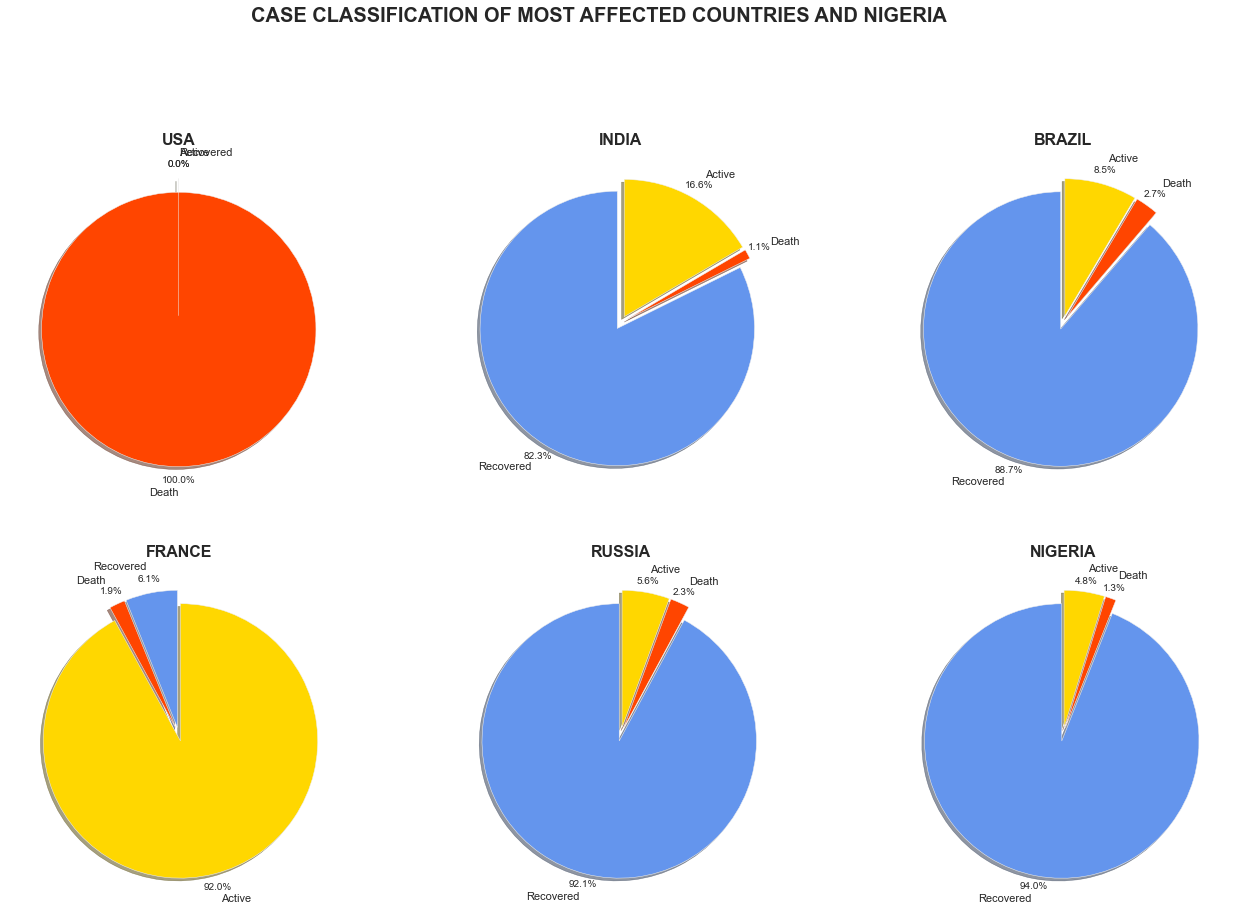

In [47]:
            # C. Let's Plot!

# Setting plot area, color and labels
fig = plt.figure(figsize = (20,20))
colors_series = ['cornflowerblue','orangered','gold']
explode = (0.05,0.05,0.05)
labels=["Recovered", "Death", "Active"]

#Pie chart for USA
plt.subplot(331)
plt.pie(dist_usa.values.flatten(), labels = labels, colors = colors_series, explode = explode,startangle = 90, autopct = '%1.1f%%', pctdistance=1.1, labeldistance=1.19, shadow = True)
plt.title('USA', fontsize = 16, fontweight="bold")

#Pie chart for India
plt.subplot(332)
plt.pie(dist_india.values.flatten(), labels = labels, colors = colors_series, explode = explode, startangle = 90, autopct = '%1.1f%%', pctdistance=1.1, labeldistance=1.19, shadow = True)
plt.title('INDIA', fontsize = 16, fontweight="bold")

#Pie chart for Brazil
plt.subplot(333)
plt.pie(dist_brazil.values.flatten(), labels = labels, colors = colors_series, explode = explode, startangle = 90,autopct = '%1.1f%%', pctdistance=1.1, labeldistance=1.19, shadow = True)
plt.title('BRAZIL', fontsize = 16, fontweight="bold")

#Pie chart for France
plt.subplot(334)
plt.pie(dist_france.values.flatten(), labels = labels, colors = colors_series, explode = explode, startangle = 90, autopct = '%1.1f%%', pctdistance=1.1, labeldistance=1.19, shadow = True)
plt.title('FRANCE', fontsize = 16, fontweight="bold")

#Pie chart for Russia
plt.subplot(335)
plt.pie(dist_russia.values.flatten(), labels = labels, colors = colors_series, explode = explode, startangle = 90,autopct = '%1.1f%%', pctdistance=1.08, labeldistance=1.17, shadow = True)
plt.title('RUSSIA', fontsize = 16, fontweight="bold")

#Pie chart for Nigeria
plt.subplot(336)
plt.pie(dist_nig.values.flatten(), labels = labels, colors = colors_series, explode = explode, startangle = 90,autopct = '%1.1f%%', pctdistance=1.08, labeldistance=1.17, shadow = True)
plt.title('NIGERIA', fontsize = 16, fontweight="bold")

#Title of plot
plt.suptitle('CASE CLASSIFICATION OF MOST AFFECTED COUNTRIES AND NIGERIA', fontsize = 20, fontweight="bold")

#Showing plot
plt.show()

### Insights
In this group classification, It can be seen that Nigeria has the highest recovery rate of 94.1% and lowest rate of active cases with the value of 4.7% when compared to the other top 5 affected countries. Although the death rate in Nigeria is low with the value of 1.3% but this is not the lowest when compared with the other 5 countries. Surprisingly, India actually has the lowest death rate of 1.1%.


### B. HOW DOES NIGERIA'S COVID19 CASE COMPARE TO THE REST OF THE WORLD?

Method: Using line plot to plot two lines, one for the rest of the world and the other for Nigeria based on the Cummulative COVID19 Confirmed Cases

In [298]:
        #A. Getting and Cleaning data

#Reading WHO data from csv
who=pd.read_csv("WHO-COVID-19-global-data.csv")

#Removing Nigeria
who_dropng = who[who.Country != 'Nigeria']
#Grouping by date reported
who_notng = who_dropng.groupby("Date_reported").sum()

#Creating Nigeria only dataframe
who_ng = who[who["Country"]=="Nigeria"]
#Grouping by date reported
who_nig = who_ng.groupby("Date_reported").sum()

        #B. Let's Plot!

#Initiating plot
fig8 = go.Figure()

#Creating plot for the other world
fig8.add_trace(go.Scatter(x = who_notng.index, y = who_notng['Cumulative_cases'],line_color = 'blue', name="Other parts of the world"))

#Creating plot for Nigeria
fig8.add_trace(go.Scatter(x = who_nig.index, y = who_nig['Cumulative_cases'],line_color = 'green',mode="lines", name="Nigeria"))

#Setting plot title
fig8.update_layout(title = 'CUMMULATIVE CONFIRMED CASES WORLDWIDE')

#Show the plot
fig8.show()

### Insights

This line plot clearly shows that when compared to the rest of the world, Nigeria's confirmed cases do not match even one third of the world's cases. Suffice to say that most countries actually have it worse.

### C. WHO REGION-WISE CASE DISTRIBUTION

Method: Using pie chart to represent the total confirmed cases by WHO Region classification

In [299]:
#Grouping by WHO region
who_region=drop_global.groupby("WHO Region")["Total Confirmed Cases"].sum().reset_index()

#Creating plots
colors = ['orangered', 'seagreen', 'rebeccapurple', 'brown', 'darkslategrey', 'cadetblue']

fig9 = go.Figure(data=[go.Pie(labels = who_region["WHO Region"], values = who_region["Total Confirmed Cases"], pull=[0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05], hole=.3)])

fig9.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=15,marker=dict(colors=colors))

# Setting layout
fig9.update_layout(title = 'WHO REGION-WISE CASE DISTRIBUTION', width = 800, height = 700, margin = dict(t = 0, l = 0, r = 0, b = 0), paper_bgcolor='oldlace')

#Showing plot
fig9.show()

### Insight

From this chart, we can see that based on the total confirmed COVID19 cases, the hardest hit regions are Americas, Europe and South-East Asia while the least hit regions are Eastern Mediterrean, Africa, Western Pacific and Other.
Well Nigeria is in the African region which is one of the least hit regions.
